## PART 1 : Import necessary functions, set parameters and load your own recordings ##

#### Import librairies, custom functions and set repository folder ####

In [1]:
# Importation of librairies and functions
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json

In [2]:
# check some package versions for documentation and reproducibility
import sys
import mne
from matplotlib import __version__ as plt_version
import scipy
print('Python sys', sys.version)
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('mne', mne.__version__)
print('sci-py', scipy.__version__)
print('matplotlib', plt_version)

Python sys 3.12.0 | packaged by conda-forge | (main, Oct  3 2023, 08:26:13) [MSC v.1935 64 bit (AMD64)]
pandas 2.1.2
numpy 1.26.0
mne 1.5.1
sci-py 1.11.3
matplotlib 3.8.1


In [3]:
def _set_cd_repo_folder():
    """sets current working directory to main repo folder"""
    cd = os.getcwd()
    check = 0

    while os.path.basename(cd) != 'ReSync':
        cd = os.path.dirname(cd)
        check += 1
        if check > 10: raise ValueError('Repo path not found')
    
    os.chdir(cd)
    print(f'working directory changed to {os.getcwd()}')

    return os.getcwd()


In [4]:
project_path = _set_cd_repo_folder()

working directory changed to c:\Users\Juliette\Research\Projects\Synchronization_project\Code\ReSync


In [5]:
# import custom-made functions:

import functions.preprocessing as preproc
import functions.utils as utils
import functions.main_resync as resync
import functions.interactive as interact
import functions.tmsi_poly5reader as poly5_reader
import functions.loading_data as loading

In [6]:
# load pyPerceive functions
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.join(os.getcwd(), 'PyPerceive'))
os.chdir(os.path.join(os.getcwd(), 'code'))
pyPerceive_path = os.getcwd()
print (f'working dir to go fetch PyPerceive functions:{pyPerceive_path}')

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

#reset the proper working directory for the analysis
os.chdir(project_path)
print (f'working dir set back to:{project_path}')

working dir to go fetch PyPerceive functions:c:\Users\Juliette\Research\Projects\Synchronization_project\Code\PyPerceive\code
working dir set back to:c:\Users\Juliette\Research\Projects\Synchronization_project\Code\ReSync


#### Load your own LFP data: ####

Resulting variables needed for subsequent analysis:
- LFP_array (np.ndarray, 6d): the raw LFP recording, containing all channels
- lfp_sig (np.ndarray, 1d): the channel containing the LFP signal from the hemisphere where the stimulation was delivered to generate artefacts
- LFP_rec_ch_names (list): names of all the channels, in a list (will be used to annotate cropped recording)
- sf_LFP (int): sampling frequency of intracerebral signal


In [7]:
# choose LFP file
sub019 = main_class.PerceiveData(
    sub = "019", 
    incl_modalities=['streaming'],
    incl_session = ["fu24m"],
    incl_condition =['m0s0','m0s1','m1s0','m1s1'],
    incl_task = ["rest","fingerTap"],
    # incl_contact = ["RingL", "SegmInterR", "SegmIntraR"],
    import_json=False,
    warn_for_metaNaNs=False,
    allow_NaNs_in_metadata=False
)
LFP_rec = sub019.streaming.fu24m.m0s0.rest.run1.data

LFP_array, lfp_sig, LFP_rec_ch_names, sf_LFP = loading._set_lfp_data(LFP_rec, ch_i=0)

add run 1
Creating RawArray with float64 data, n_channels=6, n_times=45250
    Range : 0 ... 45249 =      0.000 ...   180.996 secs
Ready.
add run 1
Creating RawArray with float64 data, n_channels=6, n_times=41000
    Range : 0 ... 40999 =      0.000 ...   163.996 secs
Ready.
add run 1
Creating RawArray with float64 data, n_channels=6, n_times=41813
    Range : 0 ... 41812 =      0.000 ...   167.248 secs
Ready.
add run 1
Creating RawArray with float64 data, n_channels=6, n_times=32187
    Range : 0 ... 32186 =      0.000 ...   128.744 secs
Ready.
add run 1
Creating RawArray with float64 data, n_channels=6, n_times=44563
    Range : 0 ... 44562 =      0.000 ...   178.248 secs
Ready.
add run 1
Creating RawArray with float64 data, n_channels=6, n_times=41750
    Range : 0 ... 41749 =      0.000 ...   166.996 secs
Ready.
add run 1
Creating RawArray with float64 data, n_channels=6, n_times=52375
    Range : 0 ... 52374 =      0.000 ...   209.496 secs
Ready.
The data object has:
	45250 time s

#### Load your own external data: ####
(our external data recorder is a TMSi Data recorder.)

PM: NOTICE THE POP UP WINDOW AFTER RUNNING, TO SELECT THE FILE LOCATION

Resulting variables:
- external_file (np.ndarray, multi-dimensional): the complete external recording containing all channels recorded
- BIP_channel (np.ndarray, 1d): the channel containing the signal from the bipolar electrode used to pick up the artefacts on the IPG/cable
- external_rec_ch_names (list, same length as the number of channels in external_file): list of the channels names, to rename them accordingly after alignment
- sf_external (int): sampling frequency of the external data recorder

In [10]:
TMSi_data = poly5_reader.Poly5Reader()  # open TMSi data from poly5
# extract necessary objects for further analysis
(BIP_channel,
 external_file,
 external_rec_ch_names,
 sf_external) = loading._load_TMSi_artefact_channel(TMSi_data) 

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Recordings/TMSi files/sub-019/24MFU/sub019_24mfu_M0S0_BrStr_Rest - 20230404T101235/sub019_24mfu_M0S0_BrStr_Rest-20230404T101235.DATA.Poly5
	 Number of samples:  846483 
	 Number of channels:  18 
	 Sample rate: 4000 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=18, n_times=846483
    Range : 0 ... 846482 =      0.000 ...   211.620 secs
Ready.
The data object has:
	846483 time samples,
	and a sample frequency of 4000.0 Hz
	with a recording duration of 211.62075 seconds.
	18 channels were labeled as 
['BIP 01', 'BIP 02', 'BIP 03', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'SpO2', 'PLETH', 'HRate', 'Stat', 'X-AXIS', 'Y-AXIS', 'Z-AXIS', 'STATUS', 'Counter 2power24'].
The channel used to align datas is the channel named BIP 02 and has index 1


## **READ ME** ##

Before starting the run_resync function, be careful to check that the config file is properly set. In particular, pay attention to:
- write the proper subject ID (to not overwrite previous analysis)
- by default use kernel "2", and set "real_index_LFP" to 0 for the first run. This can be adjusted if necessary before re-running.
- by default, set "consider_first_seconds_LFP", "consider_first_seconds_external" and "ignore_first_seconds_external" to null. 

Default parameters to adjust for our systems are:

- For TMSi SAGA with sf = 4000Hz or 4096Hz : thresh_external = -0.001, ch_name_BIP = "BIP 01"
- For TMSi SAGA with sf = 512Hz : thresh_external = -0.0005, ch_name_BIP = "BIP 01"
- For TMSi Porti with sf = 2048Hz : thresh_external = -2000, ch_name_BIP = "Bip25"

## PART 2: Align recordings: ##

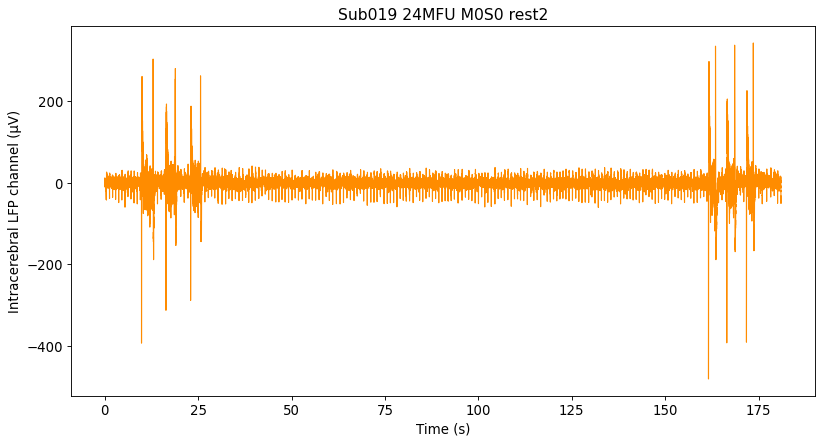

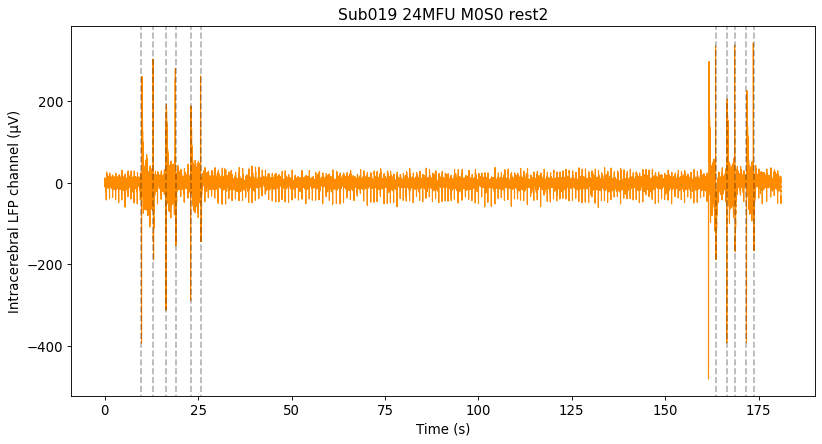

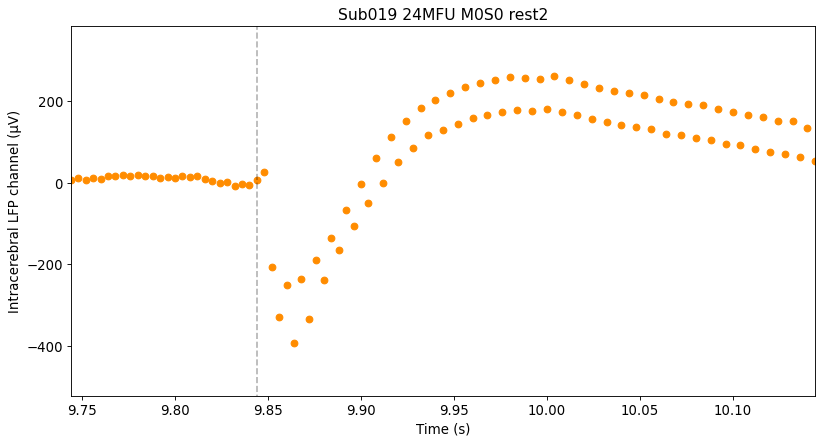

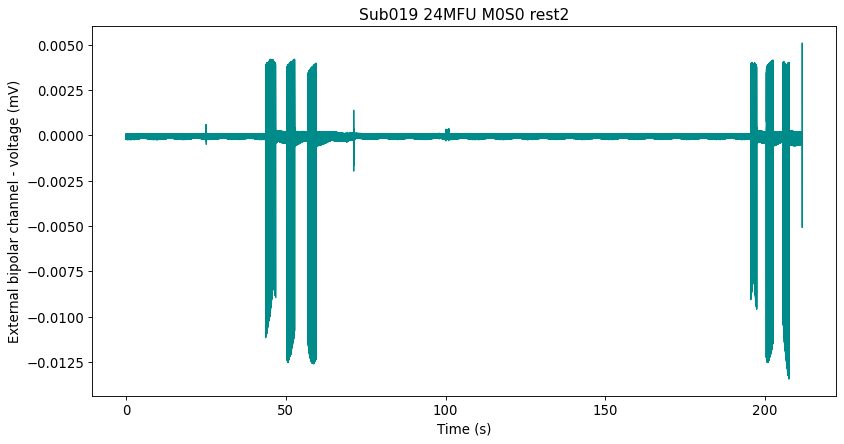

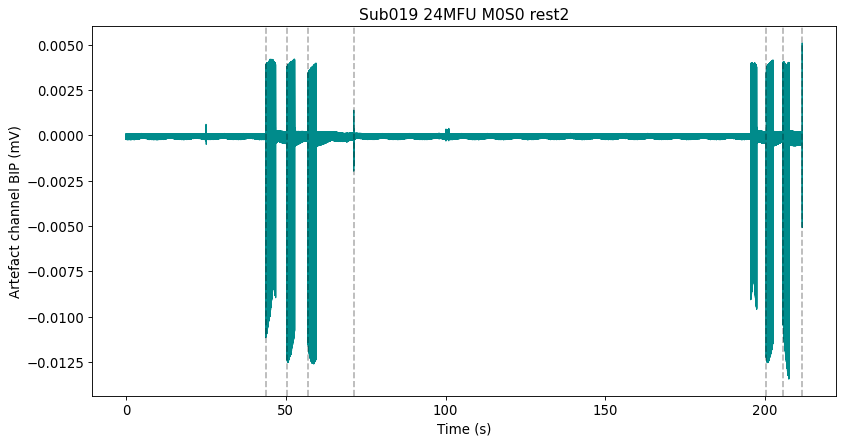

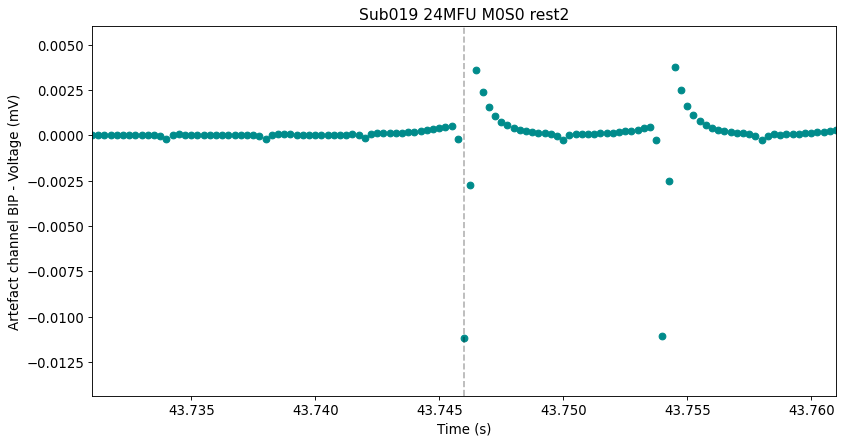

Alignment performed ! 
Please check carefully in all figures that the samples selected 
as start of the artefact are correct, and if they are not you can either
a. try with the other kernel, or b. select manually the sample where the artefact starts and re-run the function in the next notebook cell.


In [11]:
%matplotlib inline

(LFP_df_offset, 
 external_df_offset) = resync.run_resync(
    LFP_array=LFP_array,
    lfp_sig=lfp_sig,
    LFP_rec_ch_names=LFP_rec_ch_names,
    sf_LFP = sf_LFP,
    external_file=external_file,
    BIP_channel=BIP_channel,
    external_rec_ch_names=external_rec_ch_names,
    sf_external = sf_external,
    SHOW_FIGURES = True
)

#### Manual selection if no kernel is accurate enough: ####

WARNING: the plot is displayed in an interactive window, look for the pop up. Be careful that when you select the sample the user input window is not already opened and waiting for input, because it doesn't take into account the point selected after the opening of the user input window. If you're not sure, answer 'n' to the user input window and reselect the sample, then answer 'y' when it pops-up again.

WARNING 2: the sample chosen as 'start of the artefact' will automatically be the last point you clicked on. Be careful not to click anywhere else on the plot after having selected the proper sample.

In [ ]:
%matplotlib qt

closest_value_lfp = interact.select_sample(
    lfp_sig,
    sf_LFP
)

#### Run again the run_resync function once the real_art_time is adjusted: ####

In [ ]:
%matplotlib inline

(LFP_df_offset, 
 external_df_offset) = resync.run_resync(
    LFP_array=LFP_array,
    lfp_sig=lfp_sig,
    LFP_rec_ch_names=LFP_rec_ch_names,
    sf_LFP=sf_LFP,
    external_file=external_file,
    BIP_channel=BIP_channel,
    external_rec_ch_names=external_rec_ch_names,
    sf_external=sf_external,
    real_art_time_LFP=closest_value_lfp,
    SHOW_FIGURES=True
)

## PART 3 : Look for timeshift ##

Nothing needs to be changed in the following cells, they just need to be executed one after the other and follow instructions for interactive cells, until the timeshift is plotted:

In [12]:
%matplotlib qt

#import settings
json_path = os.path.join(os.getcwd(), 'config')
json_filename = 'config.json'  # dont forget json extension
with open(os.path.join(json_path, json_filename), 'r') as f:
    loaded_dict =  json.load(f)

#set saving path
if not loaded_dict['saving_path']:
    saving_path = utils.define_folders()
else:
    saving_path = os.path.join(os.path.normpath(loaded_dict['saving_path']), loaded_dict['subject_ID'])
    if not os.path.isdir(saving_path):
        os.makedirs(saving_path)

# Reselect artefact channels in the aligned (= cropped) files:
LFP_channel_offset = LFP_df_offset.iloc[:, loaded_dict['LFP_ch_index']].to_numpy()  
BIP_channel_offset = external_df_offset.iloc[:, loaded_dict['BIP_ch_index']].to_numpy() 

# Generate new timescales:
LFP_timescale_offset_s = np.arange(
    start=0, 
    stop=len(LFP_channel_offset)/sf_LFP, 
    step=1/sf_LFP
)
external_timescale_offset_s = np.arange(
    start=0, 
    stop=len(external_df_offset)/sf_external, 
    step=1/sf_external
)

# detrend external recording with high-pass filter before processing:
filtered_external_offset = preproc.filtering(BIP_channel_offset)


In [13]:
last_artefact_lfp_x = interact.select_sample(LFP_channel_offset, sf_LFP)   # manually select last artefact in intracranial recording

The closest value to 162.88405523930967 is 162.88400000000001.


In [14]:
last_artefact_external_x = interact.select_sample(filtered_external_offset, sf_external)    # manually select last artefact in external recording

The closest value to 162.8850004840132 is 162.885.


In [15]:
timeshift_ms = (last_artefact_external_x - last_artefact_lfp_x)*1000

print(f'The timeshift at the last artefact is of {timeshift_ms:.2f} ms after a recording duration of {last_artefact_external_x:.2f} s.')

if abs(timeshift_ms) > 100:
    print('WARNING: the timeshift is unusually high, consider checking for packet loss in LFP data.')

The timeshift at the last artefact is of 1.00 ms after a recording duration of 162.88 s.


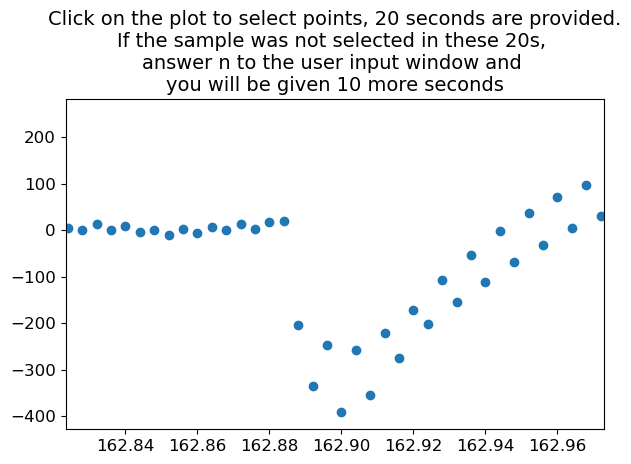

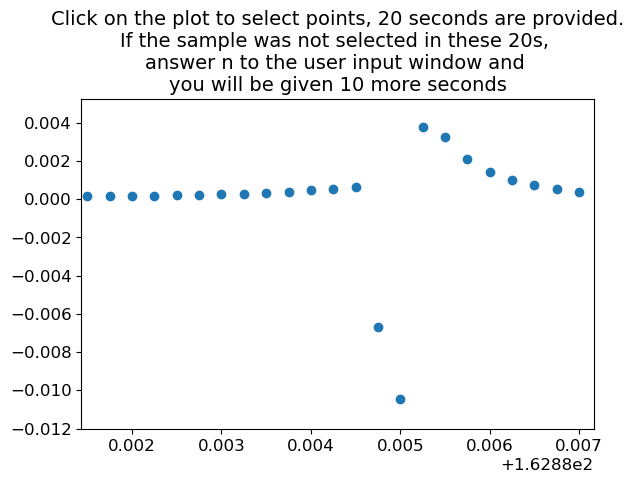

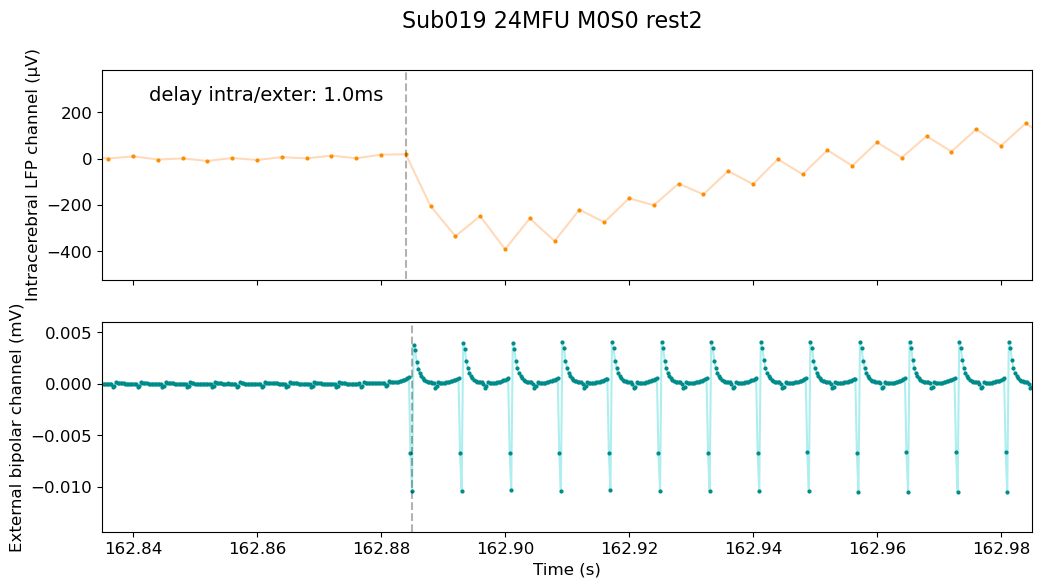

In [16]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle(str(loaded_dict['subject_ID']))
fig.set_figheight(6)
fig.set_figwidth(12)
ax1.axes.xaxis.set_ticklabels([])
ax2.set_xlabel('Time (s)')
ax1.set_ylabel('Intracerebral LFP channel (µV)')
ax2.set_ylabel('External bipolar channel (mV)')
ax1.set_xlim(last_artefact_external_x - 0.050, last_artefact_external_x + 0.1) 
ax2.set_xlim(last_artefact_external_x - 0.050, last_artefact_external_x + 0.1)
ax1.plot(
    LFP_timescale_offset_s,
    LFP_channel_offset,
    color='peachpuff',
    zorder=1
)
ax1.scatter(
    LFP_timescale_offset_s,
    LFP_channel_offset,
    color='darkorange',
    s=4,
    zorder=2
) 
ax1.axvline(
    x=last_artefact_lfp_x, 
    ymin=min(LFP_channel_offset), 
    ymax=max(LFP_channel_offset),
    color='black', 
    linestyle='dashed',
    alpha=.3
)
ax2.plot(
    external_timescale_offset_s,
    filtered_external_offset,
    color='paleturquoise',
    zorder=1
) 
ax2.scatter(
    external_timescale_offset_s,
    filtered_external_offset,
    color='darkcyan',
    s=4,
    zorder=2
) 
ax2.axvline(
    x=last_artefact_external_x,
    color='black',
    linestyle='dashed',
    alpha=.3
)
ax1.text(
    0.05, 
    0.85, 
    s='delay intra/exter: ' 
    + str(round(timeshift_ms, 2)) 
    + 'ms', 
    fontsize=14, 
    transform=ax1.transAxes
)
fig.savefig(
    saving_path 
    + '\\Fig8-Timeshift_Intracerebral and external recordings aligned_last artefact.png',
    bbox_inches='tight',
    dpi=1200
)


## PART 4 : Look for packet loss ##

WARNING: this only works for pyPerceive users for now. If you are not using pyPerceive to import your LFP data, consider changing the importation mode in resync.check_packet_loss to adapt it to your needs.

In [ ]:
json_fname = 'Report_Json_Session_Report_20230523T113952_ANOM.json'  # write json filename with extension
sub = '047' # write subject ID
resync.check_packet_loss(json_fname, sub)

## PLAYGROUND ##

##### ECG artefact verification #####

In [ ]:
%matplotlib inline

resync.ecg(
    LFP_df_offset,
    sf_LFP,
    external_df_offset,
    sf_external,
    xmin=0,
    xmax=3,
    SHOW_FIGURES = True
)